# Notes - maternal age


In [1]:
import duckdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from graphviz import Digraph
from sympy.physics.units import magnetic_density

from variables import Variables as vars

plt.style.use('../../notebook.mplstyle')

In [2]:
con = duckdb.connect("./data/us_births.db", read_only=True)

## Preparation

We use the first value from `MAGER`, `DMAGE` or `(MAGER41 + 13)` to produce `MAGE_C`, giving maternal age from 10 to 54 years.

In [ ]:
year_summary_df = con.execute(
    """
    SELECT
        year, COUNT (*) AS all, COUNT(mage_c) as mage_c, COUNT(umagerpt) as umagerpt, COUNT(mager) as mager, COUNT(dmage) as dmage, COUNT(dmagerpt) as dmagerpt, COUNT (mage_impflg) as mage_impflg, COUNT(mage_repflg) as mage_repflg, COUNT(mager41) as mager41, COUNT(mager9) as mager9
    FROM
        us_births
    WHERE
        year >= 1989
    GROUP BY year
    ORDER BY year
    """
).df()
year_summary_df

In [ ]:
mage_df = con.execute(
    """
    SELECT
        mage_c, AVG(down_ind) as p_down_ind, COUNT(*) as lb, SUM(down_ind) as down_ind
    FROM
        us_births
    WHERE
        year >= 1989
      AND restatus <> 4
    GROUP BY mage_c
    ORDER BY mage_c
    """
).df()
mage_df.set_index("mage_c")
mage_df

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(mage_df["mage_c"], mage_df["down_ind"], color='skyblue')
plt.title('DS births recorded by maternal age, 1989-2024')
plt.xlabel('Maternal age (years)')
plt.ylabel('DS recorded count')

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(mage_df["mage_c"], mage_df["lb"], color='skyblue')
plt.title('All births recorded by maternal age, 1989-2024')
plt.xlabel('Maternal age (years)')
plt.ylabel('Count')

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(mage_df["mage_c"], mage_df["p_down_ind"], color='skyblue')
plt.title('Probability DS birth recorded by maternal age, 1989-2024')
plt.xlabel('Maternal age (years)')
plt.ylabel('Probability DS birth recorded')


In [8]:
mage_from2004_df = con.execute(
    """
    SELECT
        mage_c,
        AVG(down_ind) as p_down_ind,
        AVG(p_ds_lb_nt) as p_ds_lb_nt,
        AVG(p_ds_lb_wt) as p_ds_lb_wt,
        COUNT(*) as lb,
        SUM(down_ind) as down_ind
    FROM
        us_births
    WHERE
        year >= 2004
      AND restatus <> 4
    GROUP BY mage_c
    ORDER BY mage_c
    """
).df()
mage_from2004_df.set_index("mage_c")
mage_from2004_df

,mage_c,p_down_ind,p_ds_lb_nt,p_ds_lb_wt,lb,down_ind
0,12,0.000000,0.000657,0.001273,2001,0.0
1,13,0.000125,0.000658,0.001269,11683,1.0
2,14,0.000213,0.000659,0.001269,60366,9.0
3,15,0.000476,0.000660,0.001268,211555,71.0
4,16,0.000371,0.000662,0.001269,506943,134.0
5,17,0.000395,0.000664,0.001270,950412,270.0
6,18,0.000357,0.000667,0.001272,1626623,426.0
7,19,0.000354,0.000672,0.001275,2496739,665.0
8,20,0.000355,0.000677,0.001277,3015219,820.0
9,21,0.000348,0.000684,0.001279,3311559,892.0


Text(0, 0.5, 'DS recorded count')

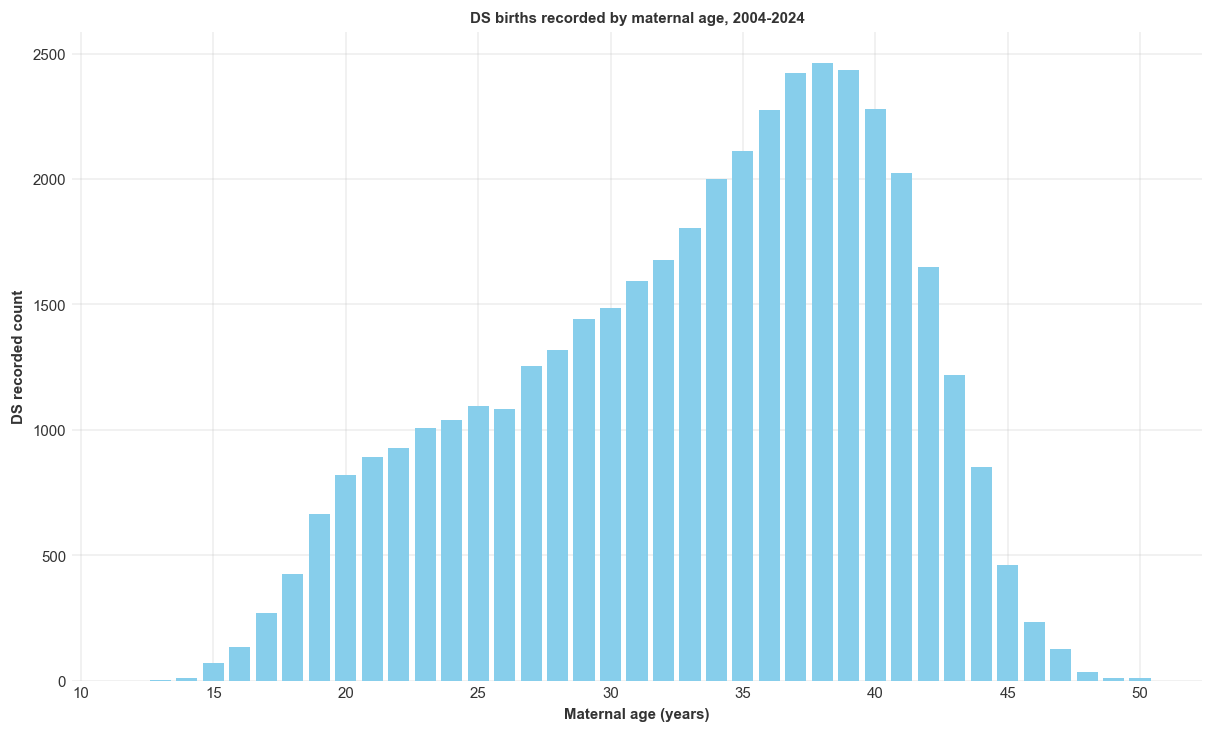

In [4]:
plt.figure(figsize=(10, 6))
plt.bar(mage_from2004_df["mage_c"], mage_from2004_df["down_ind"], color='skyblue')
plt.title('DS births recorded by maternal age, 2004-2024')
plt.xlabel('Maternal age (years)')
plt.ylabel('DS recorded count')

In [9]:
import chance
import numpy as np
ages = np.arange(10,55)
ds_lb_nt = chance.get_ds_lb_nt_probability_array(ages)


Text(0.5, 1.0, 'Probability DS birth recorded by maternal age, 2004–2024')

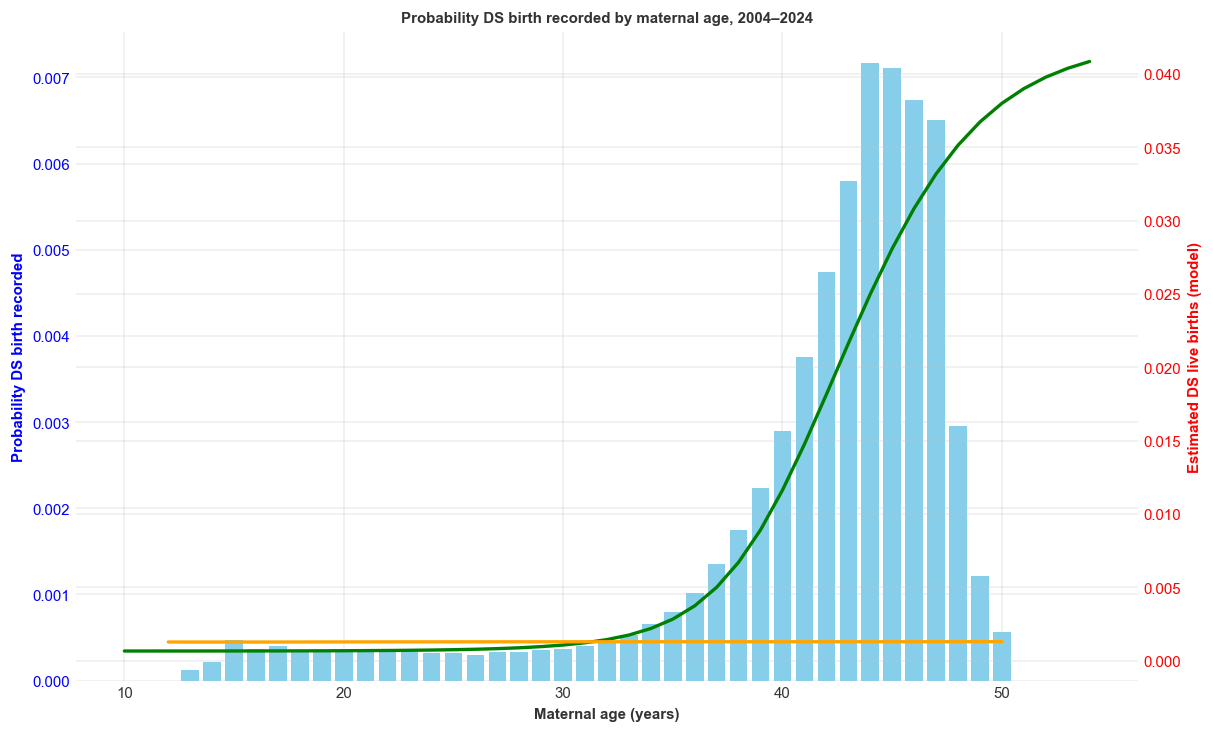

In [10]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# --- Primary axis (left) ---
ax1.bar(mage_from2004_df["mage_c"], mage_from2004_df["p_down_ind"], color='skyblue')
ax1.set_xlabel('Maternal age (years)')
ax1.set_ylabel('Probability DS birth recorded', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# --- Secondary axis (right) ---
ax2 = ax1.twinx()
ax2.plot(ages, ds_lb_nt, color='green', linewidth=2)
ax2.plot(mage_from2004_df["mage_c"], mage_from2004_df["p_ds_lb_wt"], color='orange', linewidth=2)
ax2.set_ylabel('Estimated DS live births (model)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# --- Title and layout ---
plt.title('Probability DS birth recorded by maternal age, 2004–2024')
